In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# **Clustering**

# **4 Formulasi Permasalahan**
## Articulate Your Problem Clearly
- Diberikan sebuah dataset airbnb hotel yang berisikan 16 kolom fitur
- Dataset berbentuk *unsupervised learning* dimana tidak terdapat spesifikasi label target
- Dataset akan dibentuk menjadi sebuah model clustering K Means dan nanti diekspansi kedalam klasifikasi

## Identify Your Data Sources
- Apabila terdapat sebuah barisan bernilai NaN atau missing, baris tersebut akan di *drop* dan akan mengurangi total barisan yang ada
- Fitur *price* menentukan *minimum_nights*, dan *room_type* dapat menentukan *price*
- Kemungkinan pemilihan *availability* yang bergantung dari *price* dan *room_type*

## Identify Potential Learning Problems
- Ada beberapa fitur yang tidak diperlukan ataupun nilainya hilang
- Data harus terlebih dahulu di bersihkan (Data Cleansing)
- Dataset tidak memberikan label
- Dataset harus dilakukan Data Splitting dalam pengklasifikasian
- Korelasi antar fitur relatif sedikit

## Think About Potential Bias and Ethics
- Sebagian data fitur berbahasa Jerman, dataset yang diambil berasal dari airbnb Jerman



# **Data Preparation/ Exploration**
### Melakukan pengecekan dan persiapan informasi data yang telah didapat dan nanti dipilih data yang bersangkutan untuk  diimplementasikan kepada kodingan
 - Data unsupervised (tidak memiliki label)
 - Data berjumlah 16 kolom dan 20.000 lebih rows
 - Data memiliki beberapa *missing values* atau NaN yang perlu di cleansing
 - Data memiliki beberapa kategorikal type (kita membutuhkan numerikal)
 

In [2]:
airbnb = pd.read_csv('dataset/air_bnb.csv')
airbnb.info()
# from pandas_profiling import ProfileReport
# ProfileReport(airbnb)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
id                                22552 non-null int64
name                              22493 non-null object
host_id                           22552 non-null int64
host_name                         22526 non-null object
neighbourhood_group               22552 non-null object
neighbourhood                     22552 non-null object
latitude                          22552 non-null float64
longitude                         22552 non-null float64
room_type                         22552 non-null object
price                             22552 non-null int64
minimum_nights                    22552 non-null int64
number_of_reviews                 22552 non-null int64
last_review                       18644 non-null object
reviews_per_month                 18638 non-null float64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64

In [4]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [5]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


### Penggunaan heatmap untuk melihat relasi antar fitur yang ada. Dalam heatmap ini, terlihat relasi antar fitur pre - dataframe baru dan pre - data cleansing

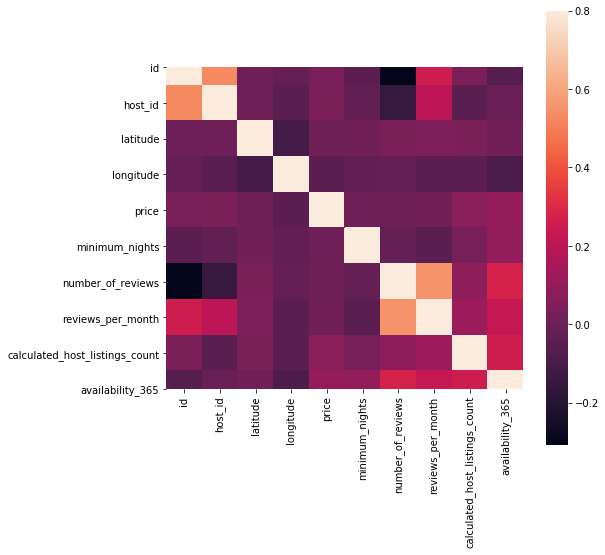

In [6]:
corrmat = airbnb.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

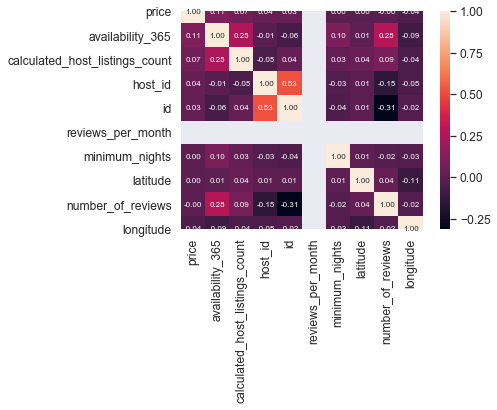

In [7]:
k =16 #banyak variabel dalam heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(airbnb[cols].values.T)
sns.set(font_scale=1.1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# **Data Cleansing**

- Membersihkan data - data yang memiliki sebuah *abnormality* atau memiliki *missing value* tertentu
- Dalam kodingan dibawah, terlebih dahulu dicek pembulatan data - data di fitur yang telah ada dan di drop beberapa rows dari fitur yang mengindikasikan adanya suatu NaN

In [8]:
#Determinasi missing value yang ada
df_null = round(100*(airbnb.isnull().sum())/len(airbnb), 2)
df_null

id                                 0.00
name                               0.26
host_id                            0.00
host_name                          0.12
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       17.33
reviews_per_month                 17.36
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [9]:
#Drop semua rows yang memiliki missing value/ NaN
airbnb = airbnb.dropna()
airbnb.shape

(18587, 16)

In [10]:
#Mengecek kembali apakah masih ada missing value atau tidak
df_null = round(100*(airbnb.isnull().sum())/len(airbnb), 2)
df_null 
#atau pakai: airbnb.isnull().sum().max()

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

# **Feature Engineering**
### Memilih fitur mana saja yang akan digunakan (Normalisasi room_type, scaling PCA juga merupakan Feature Engineering)

### Neighbourhood_group akan di normalisasikan yang tadinya berbentuk kategorikal menjadi numerikal. 
- Kemudian setelah dimasukkan kedalam dataframe baru, room_type yang tadinya berbentuk Non-ordinal Kategorikal feature type akan diubah menjadi numerikal, dengan catatan karena room_type hanya termasuk kedalam sesam room saja tapi membedakan jenisnya(antara ada yang mengisi (1), atau tidak ada yang mengisi (0)
- Room_type diberikan pandas get_dummies untuk melengkapi mana saja ruangan mana yang mengisi tiap room_type yang ada

In [11]:
airbnb['neighbourhood_group'].unique()
#Mengkonversi kategorikal dari neighbourhood_group kepada numerikal
tile_mapping = {"Mitte":1,"Pankow":2,"Tempelhof - Schöneberg":3,"Friedrichschain-Kreuzberg":4,"Neukölln":5,"Charlottenburg-Wilm.":6,"Treptow - Köpenick":7,"Steglitz - Zehlendorf":8,"Reinickendorf":9,"Lichtenberg":10,"Marzahn - Hellersdorf":11,"Spandau":12}
airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].map(tile_mapping)
airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].fillna(0)

In [12]:
df = pd.DataFrame(airbnb, columns=['longitude','latitude','price','minimum_nights','room_type','neighbourhood_group','availability_365'])
df.describe()

,longitude,latitude,price,minimum_nights,neighbourhood_group,availability_365
count,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000
mean,13.406351,52.509923,61.990961,6.536127,2.763329,84.334320
std,0.057249,0.030543,145.874539,43.156393,2.802820,120.513906
min,13.103557,52.345803,0.000000,1.000000,0.000000,0.000000
25%,13.376423,52.489195,30.000000,2.000000,1.000000,0.000000
50%,13.416857,52.509208,46.000000,2.000000,2.000000,8.000000
75%,13.439131,52.532653,70.000000,4.000000,5.000000,145.000000
max,13.757642,52.641499,8600.000000,5000.000000,12.000000,365.000000


In [13]:
df.shape

(18587, 7)

In [14]:
df = pd.get_dummies(df)
#Mengkonversi secara otomatis dengan dummy data kedalam fitur yang masih berbentuk non-ordinal kategorikal, dalam konteks ini room_type dibedakan menjadi 3

In [15]:
df.describe()

,longitude,latitude,price,minimum_nights,neighbourhood_group,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000
mean,13.406351,52.509923,61.990961,6.536127,2.763329,84.334320,0.475332,0.512939,0.011729
std,0.057249,0.030543,145.874539,43.156393,2.802820,120.513906,0.499405,0.499846,0.107665
min,13.103557,52.345803,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.376423,52.489195,30.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13.416857,52.509208,46.000000,2.000000,2.000000,8.000000,0.000000,1.000000,0.000000
75%,13.439131,52.532653,70.000000,4.000000,5.000000,145.000000,1.000000,1.000000,0.000000
max,13.757642,52.641499,8600.000000,5000.000000,12.000000,365.000000,1.000000,1.000000,1.000000


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


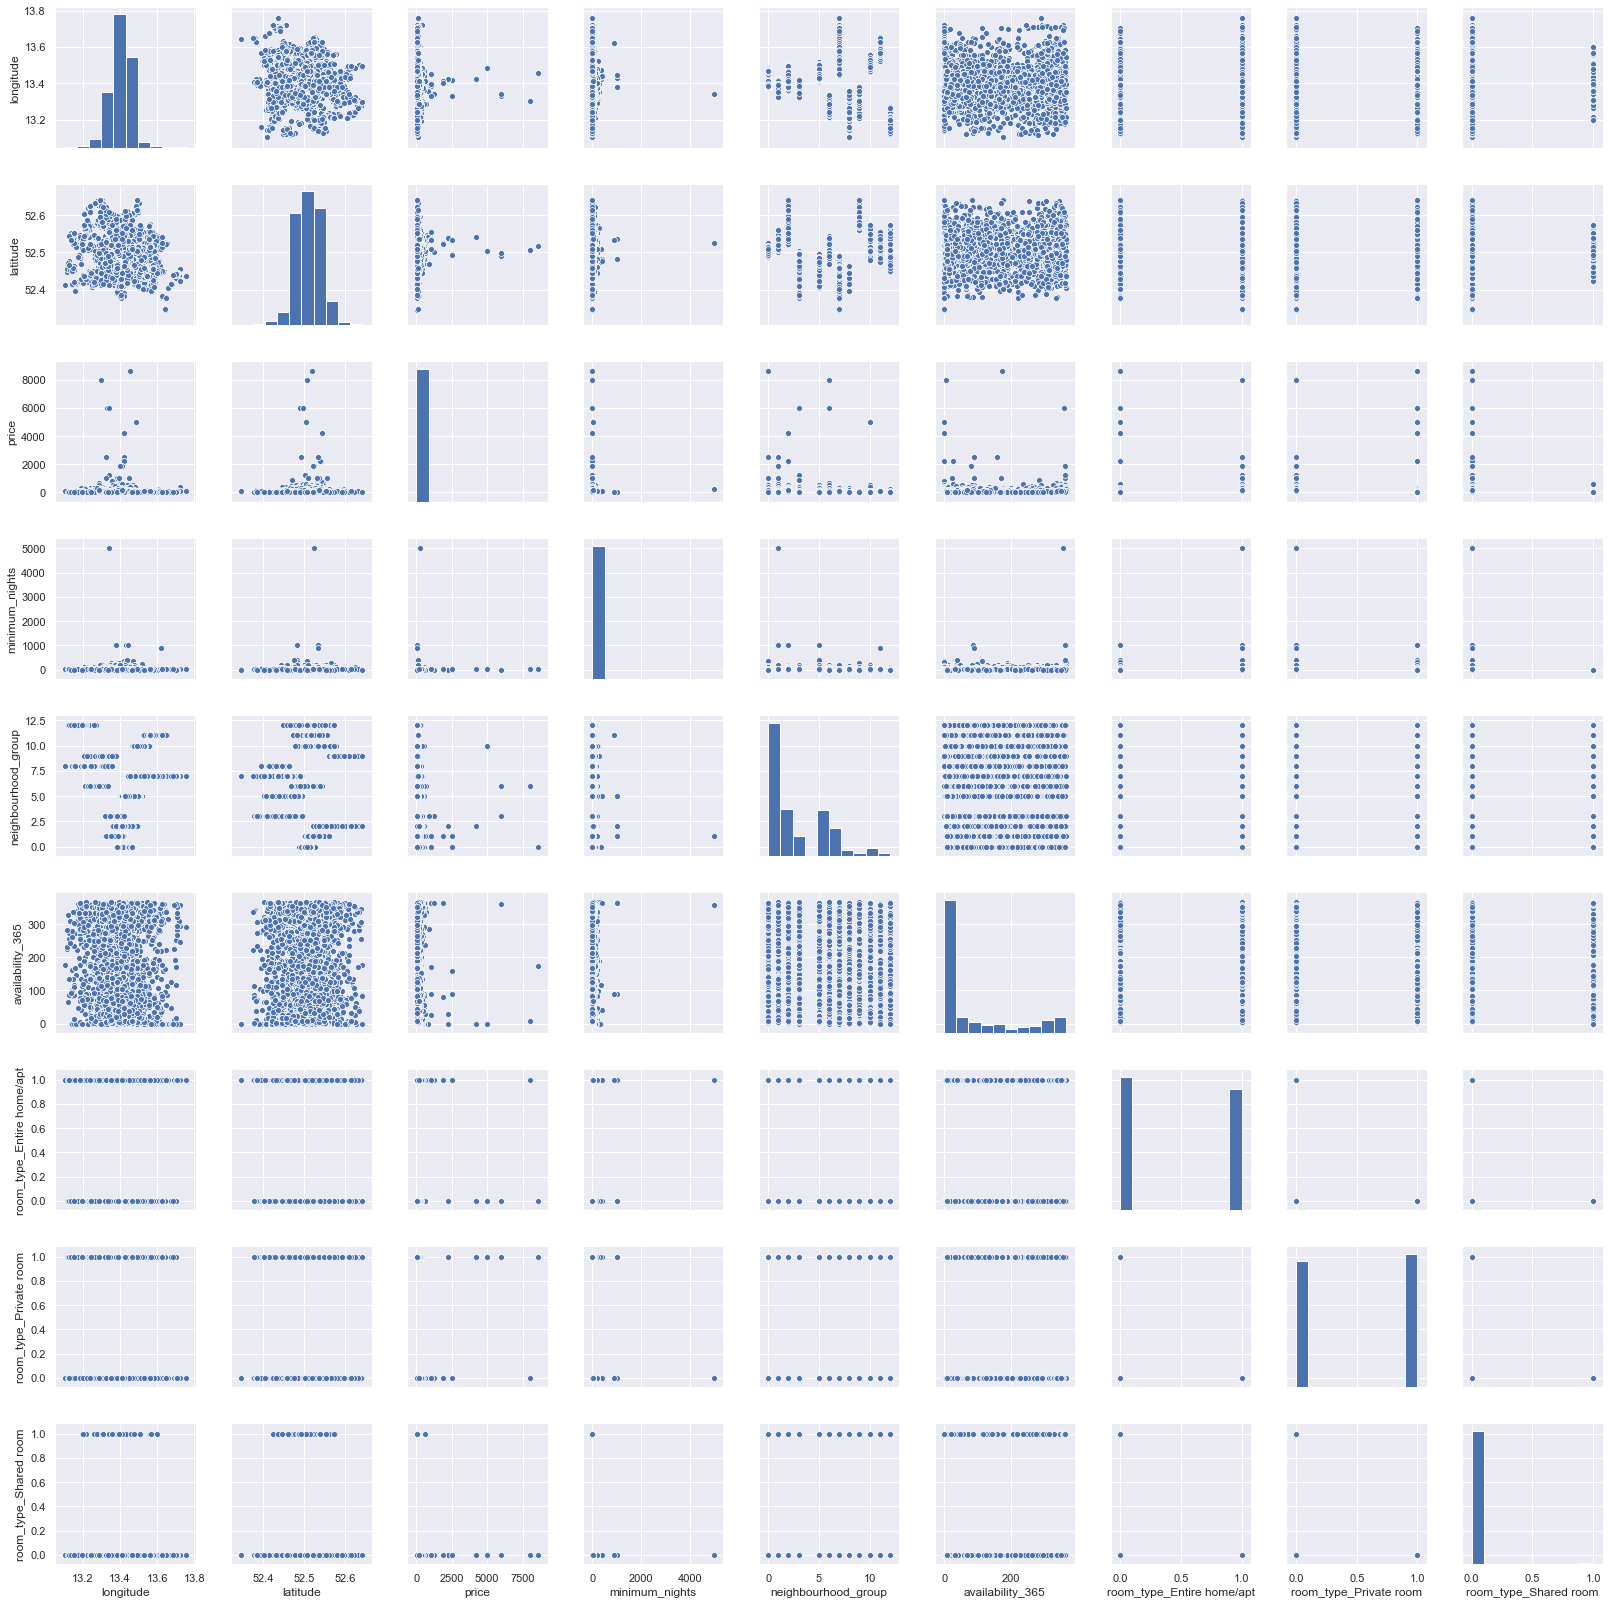

(18587, 9)

In [16]:
#Memberikan pairplot dan plottingan dari berbagai fitur yang diambil yang nanti dianalisa lebih lanjut terkait keterkaitannya dengan fitur lain
sns.set()
cols = ['longitude' ,'latitude','price', 'minimum_nights','neighbourhood_group','availability_365','room_type_Entire home/apt','room_type_Private room','room_type_Shared room']
sns.pairplot(df[cols], size = 2.5)
plt.show();   
df.shape

### Memberikan sebuah subplot dan boxplot untuk mengecek sebuah outliers setelah data cleansing/dropping.
 - Boxplot dapat mendeteksi outliers (values yang keluar jauh dari *mean* suatu fitur, setelah terdeteksi nanti fitur baru akan mengadd beberapa value yang dekat dengan *mean* dan dropping values yang jauh dari mean

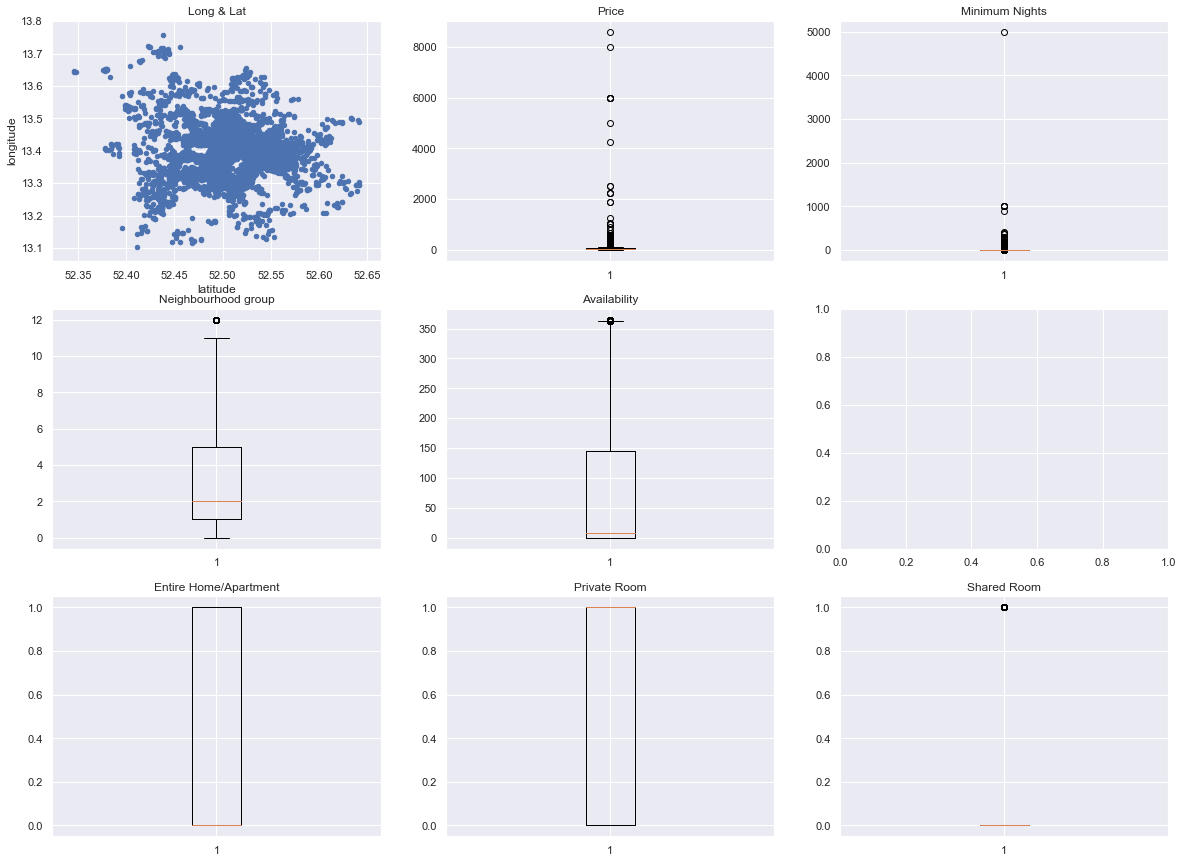

In [17]:
#Mengecek apakah ada outliers dalam fitur yang diambil dengan menggunakan boxplot
fig, axs = plt.subplots(3, 3, figsize = (20,15))

axs[0,0].scatter(df['latitude'],df['longitude'],s = 20)
axs[0,0].set_title('Long & Lat')
axs[0,0].set_xlabel('latitude')
axs[0,0].set_ylabel('longitude')

axs[0,1].boxplot(df['price'])
axs[0,1].set_title('Price')

axs[0,2].boxplot(df['minimum_nights'])
axs[0,2].set_title('Minimum Nights')

axs[1,0].boxplot(df['neighbourhood_group'])
axs[1,0].set_title('Neighbourhood group')

axs[1,1].boxplot(df['availability_365'])
axs[1,1].set_title('Availability')

axs[2,0].boxplot(df['room_type_Entire home/apt'])
axs[2,0].set_title('Entire Home/Apartment')
axs[2,1].boxplot(df['room_type_Private room'])
axs[2,1].set_title('Private Room')
axs[2,2].boxplot(df['room_type_Shared room'])
axs[2,2].set_title('Shared Room')

# axs[3,0].boxplot(df['latitude'])
# axs[3,0].set_title('latitude')
# axs[3,1].boxplot(df['longitude'])
# axs[3,1].set_title('longitude')
plt.show()

In [18]:
#Ada beberapa outliers yang terlihat setelah pembersihan outliers sebelumnya 
df = df[(df['price'] <=100) & (df['minimum_nights'] <= 6) & (df['availability_365'] >=2) & (df['neighbourhood_group'] >=1)]
df = df.drop(df[(df['longitude'] > 13.6) & (df['latitude'] < 52.5)].index)
df.reset_index(inplace=True,drop=True)
df

,longitude,latitude,price,minimum_nights,neighbourhood_group,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,13.402557,52.534537,60,4,1.0,141,1,0,0
1,13.349065,52.498855,26,5,3.0,297,0,1,0
2,13.415091,52.543157,42,2,2.0,26,0,1,0
3,13.412843,52.529071,45,3,2.0,42,0,1,0
4,13.421821,52.495476,49,5,5.0,232,1,0,0
...,...,...,...,...,...,...,...,...,...
5862,13.390644,52.520733,50,2,1.0,335,0,1,0
5863,13.336020,52.491234,35,1,6.0,43,0,1,0
5864,13.490870,52.502952,25,2,10.0,32,0,1,0
5865,13.526945,52.457982,99,1,7.0,339,1,0,0


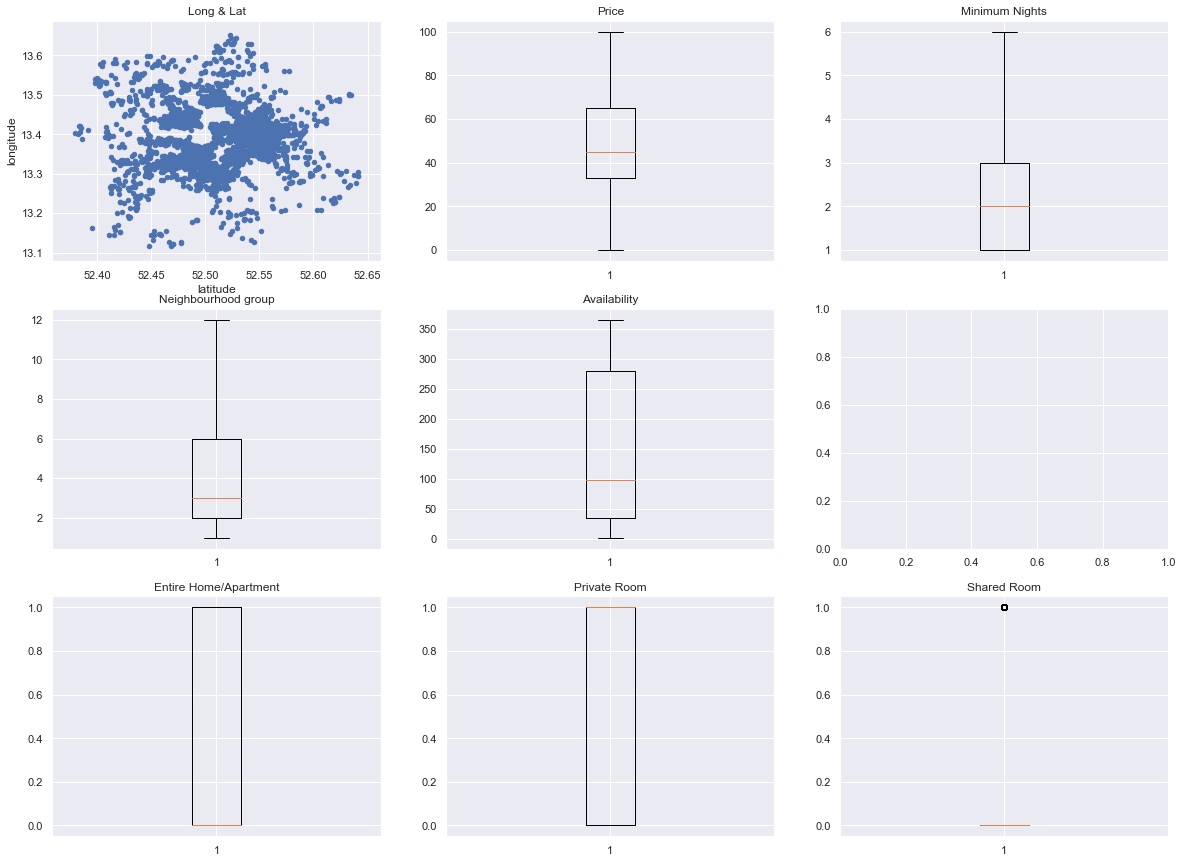

In [19]:
fig, axs = plt.subplots(3, 3, figsize = (20,15))

axs[0,0].scatter(df['latitude'],df['longitude'],s = 20)
axs[0,0].set_title('Long & Lat')
axs[0,0].set_xlabel('latitude')
axs[0,0].set_ylabel('longitude')

axs[0,1].boxplot(df['price'])
axs[0,1].set_title('Price')

axs[0,2].boxplot(df['minimum_nights'])
axs[0,2].set_title('Minimum Nights')

axs[1,0].boxplot(df['neighbourhood_group'])
axs[1,0].set_title('Neighbourhood group')

axs[1,1].boxplot(df['availability_365'])
axs[1,1].set_title('Availability')

axs[2,0].boxplot(df['room_type_Entire home/apt'])
axs[2,0].set_title('Entire Home/Apartment')
axs[2,1].boxplot(df['room_type_Private room'])
axs[2,1].set_title('Private Room')
axs[2,2].boxplot(df['room_type_Shared room'])
axs[2,2].set_title('Shared Room')

# axs[3,0].boxplot(df['latitude'])
# axs[3,0].set_title('latitude')
# axs[3,1].boxplot(df['longitude'])
# axs[3,1].set_title('longitude')
plt.show()

In [21]:
df.shape

(5867, 9)

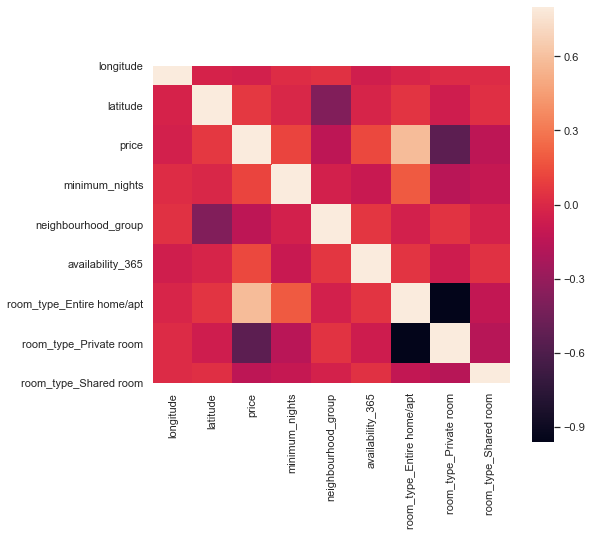

In [22]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

- Terdapat relasi antara price dan room_type Entire Home. 2 Fitur ini akan diplottingkan kedalam *eksperimen 2*, kemudian memplottingkan beberapa fitur dibawahnya (Fitur price, room_type_Entire Home, availability dan minimum_nights akan digunakan dalam Classification)

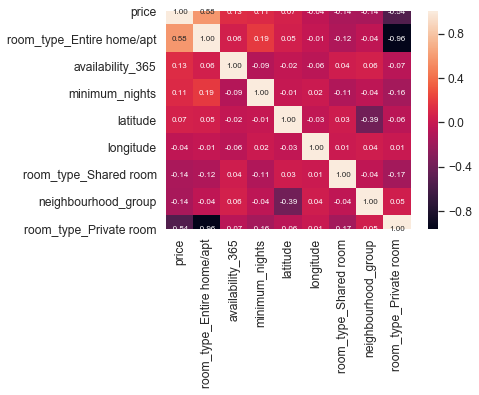

In [23]:
k =16 #banyak variabel dalam heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# **PCA implementations - Scaling, Feature Reduction/Engineering pt.2**
### Dilakukan untuk mereduksi fitur data yang banyak agar dapat dengan mudah di plottingkan ketika pemanggilan plottingan nantinya(Dilakukan scaling, dengan standard scaling juga)

In [24]:
variables = ['longitude','latitude','price','neighbourhood_group','availability_365','room_type_Entire home/apt','room_type_Private room','room_type_Shared room']
x = df.loc[:, variables].values
y = df.loc[:, ['room_type_Entire home/apt']].values
x = StandardScaler().fit_transform(x)
#Berikut nilai yang telah dibuat/ditranslasikan menjadi scaled values
x

array([[ 0.12862684,  0.61950634,  0.43634131, ...,  1.22118595,
        -1.17273341, -0.14139677],
       [-0.69068303, -0.36154939, -1.11264237, ..., -0.81887611,
         0.85270872, -0.14139677],
       [ 0.32060508,  0.85650399, -0.38370888, ..., -0.81887611,
         0.85270872, -0.14139677],
       ...,
       [ 1.48126327, -0.24891474, -1.15820072, ..., -0.81887611,
         0.85270872, -0.14139677],
       [ 2.03379484, -1.48530782,  2.2131167 , ...,  1.22118595,
        -1.17273341, -0.14139677],
       [ 0.25646877,  1.10650293,  0.89192474, ...,  1.22118595,
        -1.17273341, -0.14139677]])

In [25]:
#Dilakukan komputasi PCA secara otomatis, dan pembagian component yang ditransformasi menjadi 2 buah fitur baru
pca = PCA(n_components=2)
xpca = pca.fit_transform(x)
x_pca = pd.DataFrame(data=xpca, columns = ['PC1','PC2'])
x_pca.head()

,PC1,PC2
0,1.826697,-0.848721
1,-1.422720,-0.018690
2,-1.129368,-1.324011
3,-1.088475,-1.043740
4,1.370830,0.989394


In [26]:
# explained_variance = pca.explained_variance_ratio_
# explained_variance

#varians menentukan fitur mana saja yang baik untuk dijadikan patokan dalam pebuatan PCA, karena komponen diberikan secara otomatis, hal ini tidak diperlukan untuk sementara

In [118]:
finalDF = pd.concat([x_pca, df[['room_type_Entire home/apt']]], axis = 1)
finalDF

,PC3,PC4,price
0,1.216097,-0.211869,60
1,-1.027886,1.653697,26
2,-0.927203,-0.431208,42
3,-0.851343,-0.373508,45
4,0.862486,-0.066975,49
...,...,...,...
7639,NaN,NaN,35
7640,NaN,NaN,25
7641,NaN,NaN,99
7642,NaN,NaN,25


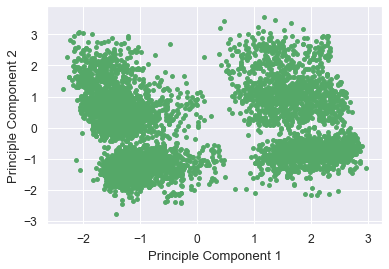

In [28]:
plt.scatter(finalDF['PC1'], finalDF['PC2'], color = 'g',s = 15)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()
#Pemberian plottingan yang berorientasi minimum_nights untuk PC1 dan PC2

# **K Means Clustering - Eksperimen 1**
### Elbow Method Evaluating
- Dibagian ini akan dilakukan sebuah clustering K Means, dimana untuk penentuan berapa banyak K yang digunakan untuk penentuan cluster nanti akan menggunakan Library sklearn import KMeans, sisa kodingan K Means Clustering sesudahnya dilakukan secara scratch
- Ketika jumlah K yang memungkinkan telah didapatkan, maka akan diplottingkan sebuah centroid sementara dan plottingan koordinasinya sebelum pembuatan algo cluster yang aslinya
-  Pemilihan K yang optimal dari Elbow Method ini adalah dengan melihat penurunan dan distance antara satu titik ke titik lainnya yang jauh dan memilih titik yang sebelum mencapai distance yang stabil antar point kluster

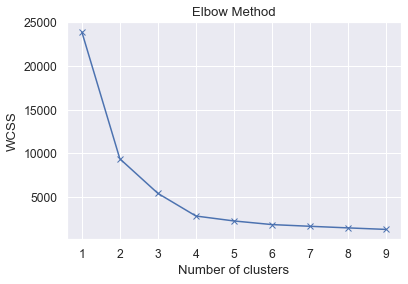

In [29]:
from sklearn.cluster import KMeans #memakai elbow method untuk mencari cluster yang optimal

wcss = [] #Within-Cluster-Sum-of-Squares

for i in range(1, 10): #range dari cluster
    kmeans = (
        KMeans(n_clusters=i, init='k-means++', 
               max_iter=100, n_init=10, random_state=0)
    )
    kmeans.fit(finalDF)
    wcss.append(kmeans.inertia_)

#plottingan
plt.plot(range(1, 10), wcss, '-bx') 
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- Mendapatkan K yang optimal dan selanjutnya visualisasi dari Principle Components yang ada
- Akan ada 2 cluster untuk mendefinisikan 2 centroid pemisah data - data yang ada pada plottingan
- 2 centroid ini di ambil dari observasi secara random

Text(0, 0.5, 'Principle Component 2')

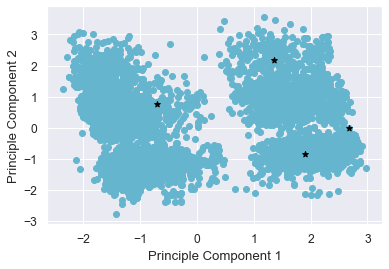

In [30]:
k=4 #from elbow method

Centroids = (finalDF.sample(n=k))
plt.scatter(finalDF['PC1'], finalDF['PC2'], color = 'c')
plt.scatter(Centroids['PC1'], Centroids['PC2'],marker='*', c='black')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')

### K means cluster modelling
- Assign semua poin yang dekat dengan cluster centroid (2 cluster untuk 2 centroid yang telah di random sebelumnya
- Kodingan akan komputasi ulang centroid yang ada sebelumnya kedalam cluster yang dibuat baru
- Dengan perulangan, assigning points dan komputasi ulang centroid akan dieksekusi terus menerus sampai perulangan selesai

-0.0833275635077294
0.15616824448940902
0.16114525705599303
0.16189035692413425
0.12898155023909558
0.1012680704120481
0.0781086835900599
0.029216047330584916
0.003185624636863199
-0.016772535055703558
-0.026972929754047414
-0.014396313374581943
-0.007926600782398457
-0.01548016396764379
-0.024499248011862707
-0.02616339973362486
-0.033678267451217714
-0.052805617484313644
-0.08753320596301895
-0.16991746254850412
-0.3374144279854509
-0.64933196584473
-1.108281349794393
-1.038491593047759
-0.5272533286958521
-0.21416241586434015
-0.1002024428699907
-0.03742772908823744
-0.007692599748324813
-0.002778434622969783
0.0


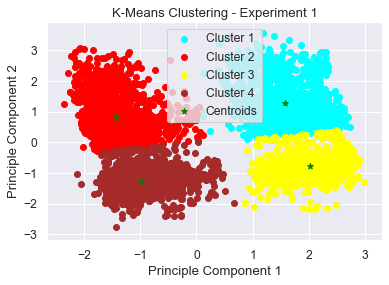

In [31]:
diff = 1
j=0

#Perulangan selama diff bukan 0, maka akan terus berjalan kodingannya sampai proses clustering selesai
while(diff!=0):
    X=finalDF
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in X.iterrows():
            d1=(row_c["PC1"]-row_d["PC1"])**2
            d2=(row_c["PC2"]-row_d["PC2"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        finalDF[i]=ED
        i=i+1
    C=[]
    #Point assignments dan komputasi ulang centroid akan terus dieksekusi
    for index,row in finalDF.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    finalDF["Cluster"]=C #Komputasi ulang centroid yang ada sebelumnya untuk dimasukkan kedalam cluster baru
    Centroids_new = finalDF.groupby(["Cluster"]).mean()[["PC2","PC1"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = ((Centroids_new['PC2'] - Centroids['PC2']).sum()  #Centroid yang baru akan dikomputasi dan dijumlahkan dengan centroid yang lama
            + (Centroids_new['PC1'] - Centroids['PC1']).sum())
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["PC2","PC1"]]
color=['cyan','red','yellow','brown']
label =['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
#Pemberian warna dan label legends agar cluster mudah dilihat

#Untuk tiap K yang ditentukan via Elbow Method, K menentukan banyak cluster yang ada serta color dan legends
for k in range(k):
    df=finalDF[finalDF["Cluster"]==k+1]
    plt.scatter(df["PC1"],df["PC2"],c=color[k],label=label[k])
    
# plt.figure(figsize = (5,5)) #Pemanggilan plottingan cluster
plt.scatter(Centroids["PC1"],Centroids["PC2"],marker='*',c='green',label = 'Centroids')
plt.title("K-Means Clustering - Experiment 1")
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.show()

# **Eksperimen 2**
### Feature Engineering
 - Feature engineering untuk memilih fitur - fitur baru yang ditesting kedalam eksperimen #2

In [122]:
df = pd.DataFrame(airbnb, columns=['longitude','latitude','price','minimum_nights','room_type','availability_365'])
df = pd.get_dummies(df)
df.shape

(18587, 8)

### Data Cleansing - Experiment 2
- Specific data cleansing untuk fitur yang dipilih
- Karena sebelum pemetaan eksperimen 1 data umum sudah digeneralisasi dan di cleansing, maka untuk eksperimen 2 hanya butuh *polishing* saja untuk data yang digunakan

In [123]:
df = df[(df['price'] <=100) & (df['minimum_nights'] <= 6) & (df['availability_365'] >=2)]
df = df.drop(df[(df['longitude'] > 13.6) & (df['latitude'] < 52.5)].index)
df.reset_index(inplace=True,drop=True)
df

,longitude,latitude,price,minimum_nights,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,13.402557,52.534537,60,4,141,1,0,0
1,13.349065,52.498855,26,5,297,0,1,0
2,13.415091,52.543157,42,2,26,0,1,0
3,13.412843,52.529071,45,3,42,0,1,0
4,13.421821,52.495476,49,5,232,1,0,0
...,...,...,...,...,...,...,...,...
7595,13.336020,52.491234,35,1,43,0,1,0
7596,13.490870,52.502952,25,2,32,0,1,0
7597,13.526945,52.457982,99,1,339,1,0,0
7598,13.467071,52.507884,25,1,8,0,1,0


- Feature Engineering pemilihan fitur yang akan diproses untuk di scaling dan di reduksi dengan PCA
- Fitur terpilih : longitude, latitude, price, Entire Home (room_type), dan availability
- Entire Home digunakan menjadi data acuan sumbu Y karena memiliki sebuah keterkaitan yang kuat dengan price (ini akan sangat berguna dalam classification, untuk eksperimen clustering #2 ini sengaja digunakan di sumbu Y untuk melihat hasil clusteringnya yang berbeda dengan eksperimen #1

In [124]:
variables = ['longitude','latitude','price','room_type_Entire home/apt','availability_365']
x = df.loc[:, variables].values
y = df.loc[:, ['price']].values
x = StandardScaler().fit_transform(x)

In [125]:
#Dilakukan komputasi PCA secara otomatis, dan pembagian component yang ditransformasi menjadi 2 buah fitur baru
pca = PCA(n_components=2)
xpca = pca.fit_transform(x)
x_pca = pd.DataFrame(data=xpca, columns = ['PC3','PC4'])
x_pca.head()

,PC3,PC4
0,1.216097,-0.211869
1,-1.027886,1.653697
2,-0.927203,-0.431208
3,-0.851343,-0.373508
4,0.862486,-0.066975


In [126]:
finalDF = pd.concat([x_pca, df[['price']]], axis = 1)
finalDF

,PC3,PC4,price
0,1.216097,-0.211869,60
1,-1.027886,1.653697,26
2,-0.927203,-0.431208,42
3,-0.851343,-0.373508,45
4,0.862486,-0.066975,49
...,...,...,...
7595,-1.193704,0.604306,35
7596,-1.699276,-1.375411,25
7597,2.350699,-1.284659,99
7598,-1.690937,-1.166313,25


- Didapatkan visualisasi plottingan untuk PC3 dan PC4 yang baru

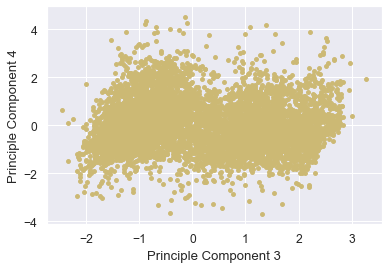

In [37]:
plt.scatter(finalDF['PC3'], finalDF['PC4'], color = 'y',s = 15)
plt.xlabel('Principle Component 3')
plt.ylabel('Principle Component 4')
plt.show()

# **K Means Clustering - Eksperimen 2**
### Elbow Method Evaluating
- Dibagian ini akan dilakukan sebuah clustering K Means, dimana untuk penentuan berapa banyak K yang digunakan untuk penentuan cluster nanti akan menggunakan Library sklearn import KMeans, sisa kodingan K Means Clustering sesudahnya dilakukan secara scratch
- Ketika jumlah K yang memungkinkan telah didapatkan, maka akan diplottingkan sebuah centroid sementara dan plottingan koordinasinya sebelum pembuatan algo cluster yang aslinya
- Pemilihan K yang optimal dari Elbow Method ini adalah dengan melihat penurunan dan distance antara satu titik ke titik lainnya yang jauh dan memilih titik yang sebelum mencapai distance yang stabil antar point kluster
- Elbow method dari eksperimen 1 akan digunakan lagi dalam eksperimen 2 untuk melihat perbedaan berapakah K yang bagus untuk eksperimen 2, dengan range yang ditingkatkan pula dari 1 - 10

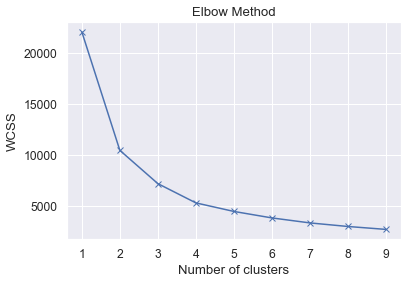

In [38]:
from sklearn.cluster import KMeans #memakai elbow method untuk mencari cluster yang optimal

wcss = [] #Within-Cluster-Sum-of-Squares

for i in range(1, 10): #range dari cluster
    kmeans = (
        KMeans(n_clusters=i, init='k-means++', 
               max_iter=100, n_init=10, random_state=0)
    )
    kmeans.fit(finalDF)
    wcss.append(kmeans.inertia_)

#plottingan
plt.plot(range(1, 10), wcss, '-bx') 
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- Didapatkan dari elbow method poin kluster paling optimal yaitu K = 3
- Dipetakkan titik centroid baru kedalam visualisasi plottingan eksperimen 2

Text(0, 0.5, 'Principle Component 4')

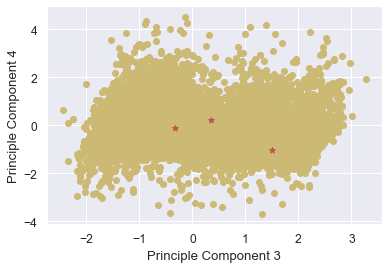

In [39]:
k=3 #from elbow method

Centroids = (finalDF.sample(n=k))
plt.scatter(finalDF['PC3'], finalDF['PC4'], color = 'y')
plt.scatter(Centroids['PC3'], Centroids['PC4'],marker='*', c='r')
plt.xlabel('Principle Component 3')
plt.ylabel('Principle Component 4')

# Clustering Model - Experiment 2
- Assign semua poin yang dekat dengan cluster centroid (2 cluster untuk 2 centroid yang telah di random sebelumnya
- Kodingan akan komputasi ulang centroid yang ada sebelumnya kedalam cluster yang dibuat baru
- Dengan perulangan, assigning points dan komputasi ulang centroid akan dieksekusi terus menerus sampai perulangan selesai

-0.010346339141985128
-0.04648318060538639
-0.08238258771723542
-0.12763954471925215
-0.16826041061080768
-0.11048206037696394
-0.09388596388106518
-0.0909287257805228
-0.0905473199183483
-0.07841076830687477
-0.0741726450127072
-0.0663419348417133
-0.07359864890246645
-0.054850857446867324
-0.03560956727976419
-0.025801942463950595
-0.015113702432119375
-0.009450698469284785
-0.002538252500668109
-0.005789074682503448
-0.0046000833454253875
-0.0018001193024583806
-0.001932320972789836
-0.0016411652967618373
-0.0029577660336531086
-0.003654038001621812
0.001011625305810837
0.0


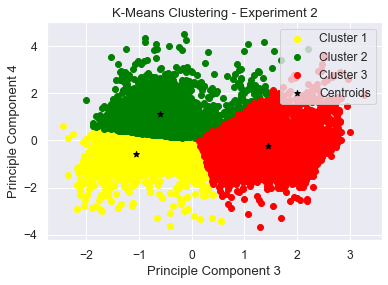

In [40]:
diff = 1
j=0

while(diff!=0):
    X=finalDF
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in X.iterrows():
            d1=(row_c["PC3"]-row_d["PC3"])**2
            d2=(row_c["PC4"]-row_d["PC4"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        finalDF[i]=ED
        i=i+1
    C=[]
    
    for index,row in finalDF.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    finalDF["Cluster"]=C
    Centroids_new = finalDF.groupby(["Cluster"]).mean()[["PC4","PC3"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = ((Centroids_new['PC4'] - Centroids['PC4']).sum() 
            + (Centroids_new['PC3'] - Centroids['PC3']).sum())
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["PC4","PC3"]]
color=['yellow','green','red']
label = ['Cluster 1','Cluster 2','Cluster 3']

for k in range(k):
    df=finalDF[finalDF["Cluster"]==k+1]
    plt.scatter(df["PC3"],df["PC4"],c=color[k], label=label[k])
    
# plt.figure(figsize = (5,5))
plt.scatter(Centroids["PC3"],Centroids["PC4"],marker='*',c='black',label = 'Centroids')
plt.title("K-Means Clustering - Experiment 2")
plt.xlabel('Principle Component 3')
plt.ylabel('Principle Component 4')
plt.legend()
plt.show()

# **Kesimpulan - Clustering**
### Dari 2 buah eksperimen yang dilakukan sebelumnya dengan tahapan – tahapan yang telah dilalui, kita mendapati beberapa poin penting, yaitu:
-	K Means clustering mampu memberikan pembedaan centroid/cluster yang sesuai dengan K yang didapati, yang sebelumnya juga terkait dengan mean dari tiap fitur yang diambil
-	Dari 2 buah eksperimen yang dilakukan, penggunaan fitur yang berbeda serta penggunaan K optimum yang berbeda menghasilkan sebuah hasil yang sangat berbeda, dengan jumlah kluster, bentuk cluster dan juga letak centroid yang berbeda – beda pula
-	Dengan melakukan data cleansing dan feature engineering sebelumnya, cluster K Means yang di plotting memberikan data yang cukup signifikan dan stabil. Apabila tidak dilakukan data cleansing (drop rows, deleting missing values) ataupun feature engineering(seleksi fitur, PCA data reduction, scaling) dan semacamnya, hasil plotting akan jauh lebih berbeda dan mungkin lebih tidak ‘teratur’ dan tidak rapih ketika dilihat hasil akhirnya.


# **Classification**


# **4 Formulasi Permasalahan**
## Articulate Your Problem Clearly
- Diberikan sebuah dataset airbnb hotel yang berisikan 16 kolom fitur
- Dataset berbentuk *unsupervised learning* dimana tidak terdapat spesifikasi label target. Tetapi, untuk classification akan dibuat sebuah label sendiri
- Dataset telah diperkecil dan disimpan kedalam DataFrame df, kemudian fitur yang akan diambil adalah minimum_nights,room_type_Entire home/apt, availability_365, dan price
- Dataset akan diproyeksikan menjadi klasifikasi Decision Tree

## Identify Your Data Sources
- Apabila terdapat sebuah barisan bernilai NaN atau missing, baris tersebut akan di *drop* dan akan mengurangi total barisan yang ada
- Fitur *price* menentukan *minimum_nights*, dan *room_type* dapat menentukan *price*
- Kemungkinan pemilihan *availability* yang bergantung dari *price* dan *room_type*
- room_type_Entire home/apt akan dijadikan sebagai target label dan ditentukan oleh banyak rows yang dipengaruhi fitur lainnya
- Test Sample & values menentukan apakah room_type_Entire home/apt benar atau tidak

## Identify Potential Learning Problems
- Ada beberapa fitur yang memiliki missing values
- Ada beberapa fitur dari room_type yang tidak dibutuhkan (perlu di drop/ tidak diambil)
- Data harus terlebih dahulu di bersihkan (Data Cleansing)
- Dataset tidak memberikan label terlebih dahulu, sehingga harus dibuat
- Dataset harus dilakukan Data Splitting dalam pengklasifikasian (training & test dataset)

## Think About Potential Bias and Ethics
- Sebagian data fitur berbahasa Jerman, dataset yang diambil berasal dari airbnb Jerman
- Ada beberapa room_type yang tidak dianggap dalam pengujian klasifikasi Decision Tree ini

# **Data Exploration/ Preparation**
## Data akan mengeksplorasi ulang hasil pengaplikasian dataframe baru untuk df yang kemudian akan dimasukkan sebuah dataframe baru lagi untuk klasifikasi
- Data mulai dari dataframe Df sebelumnya
- Ada sekitar 6 kolom awal dan 7644 baris sebelumnya, nanti akan diperkecil menjadi 4 kolom (room_type akan diberikan get_dummies untuk determinasi pemecahan secara detail room_type yang ada)
- room_type_Entire home/apt akan dijadikan target kolom/label

In [41]:
df = pd.DataFrame(airbnb, columns=['minimum_nights','room_type','availability_365','price'])
df = pd.get_dummies(df)
df.describe()

,minimum_nights,availability_365,price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000
mean,6.536127,84.334320,61.990961,0.475332,0.512939,0.011729
std,43.156393,120.513906,145.874539,0.499405,0.499846,0.107665
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,30.000000,0.000000,0.000000,0.000000
50%,2.000000,8.000000,46.000000,0.000000,1.000000,0.000000
75%,4.000000,145.000000,70.000000,1.000000,1.000000,0.000000
max,5000.000000,365.000000,8600.000000,1.000000,1.000000,1.000000


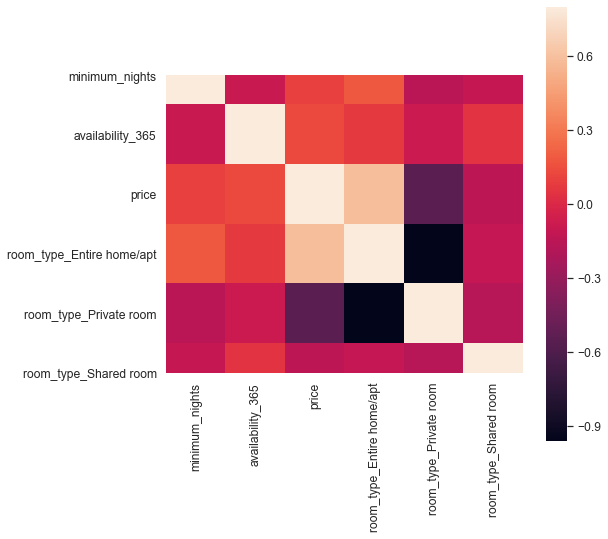

In [116]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);


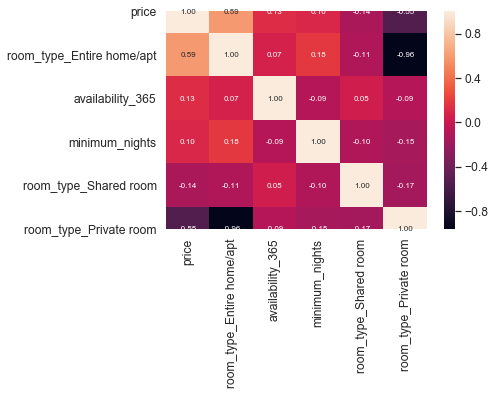

In [117]:
k =16 #banyak variabel dalam heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# **Data Cleansing**
### Dilakukan sebuah data cleansing yang mengecek apakah ada missing value di dataframe sebelumnya dan apakah ada outliers
- Bila ada missing values akan di drop rowsnya
- Bila ada outliers, sama seperti cluster akan di hilangkan sehingga mean dari tiap fitur jelas

In [42]:
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

minimum_nights               0.0
availability_365             0.0
price                        0.0
room_type_Entire home/apt    0.0
room_type_Private room       0.0
room_type_Shared room        0.0
dtype: float64

In [43]:
df.dtypes

minimum_nights               int64
availability_365             int64
price                        int64
room_type_Entire home/apt    uint8
room_type_Private room       uint8
room_type_Shared room        uint8
dtype: object

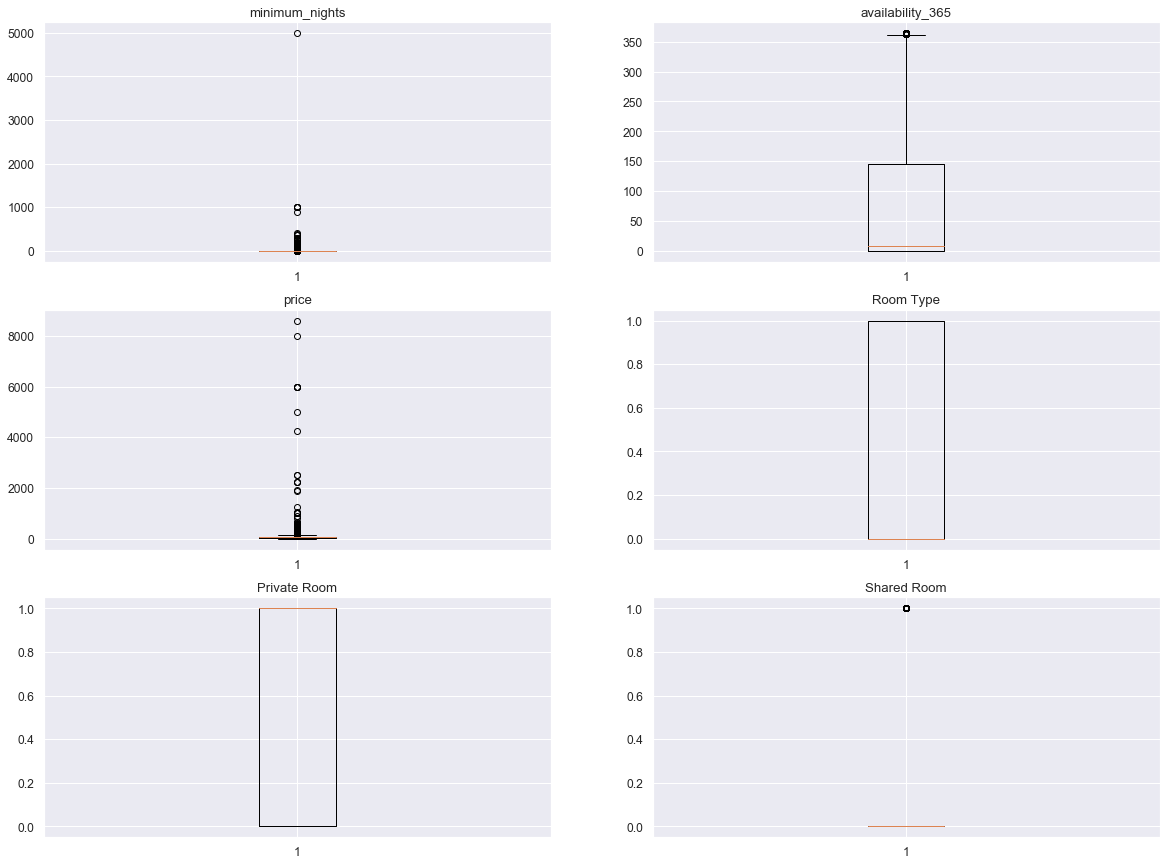

In [44]:
fig, axs = plt.subplots(3, 2, figsize = (20,15))


axs[0,0].boxplot(df['minimum_nights'])
axs[0,0].set_title('minimum_nights')
axs[0,1].boxplot(df['availability_365'])
axs[0,1].set_title('availability_365')

axs[1,0].boxplot(df['price'])
axs[1,0].set_title('price')
axs[1,1].boxplot(df['room_type_Entire home/apt'])
axs[1,1].set_title('Room Type')

axs[2,0].boxplot(df['room_type_Private room'])
axs[2,0].set_title('Private Room')
axs[2,1].boxplot(df['room_type_Shared room'])
axs[2,1].set_title('Shared Room')
plt.show()

In [45]:
df = df[(df['price'] <=100) & (df['minimum_nights'] <= 6) & (df['availability_365'] >=2)]
df.reset_index(inplace=True,drop=True)
df

,minimum_nights,availability_365,price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,4,141,60,1,0,0
1,5,297,26,0,1,0
2,2,26,42,0,1,0
3,3,42,45,0,1,0
4,5,232,49,1,0,0
...,...,...,...,...,...,...
7639,1,43,35,0,1,0
7640,2,32,25,0,1,0
7641,1,339,99,1,0,0
7642,1,8,25,0,1,0


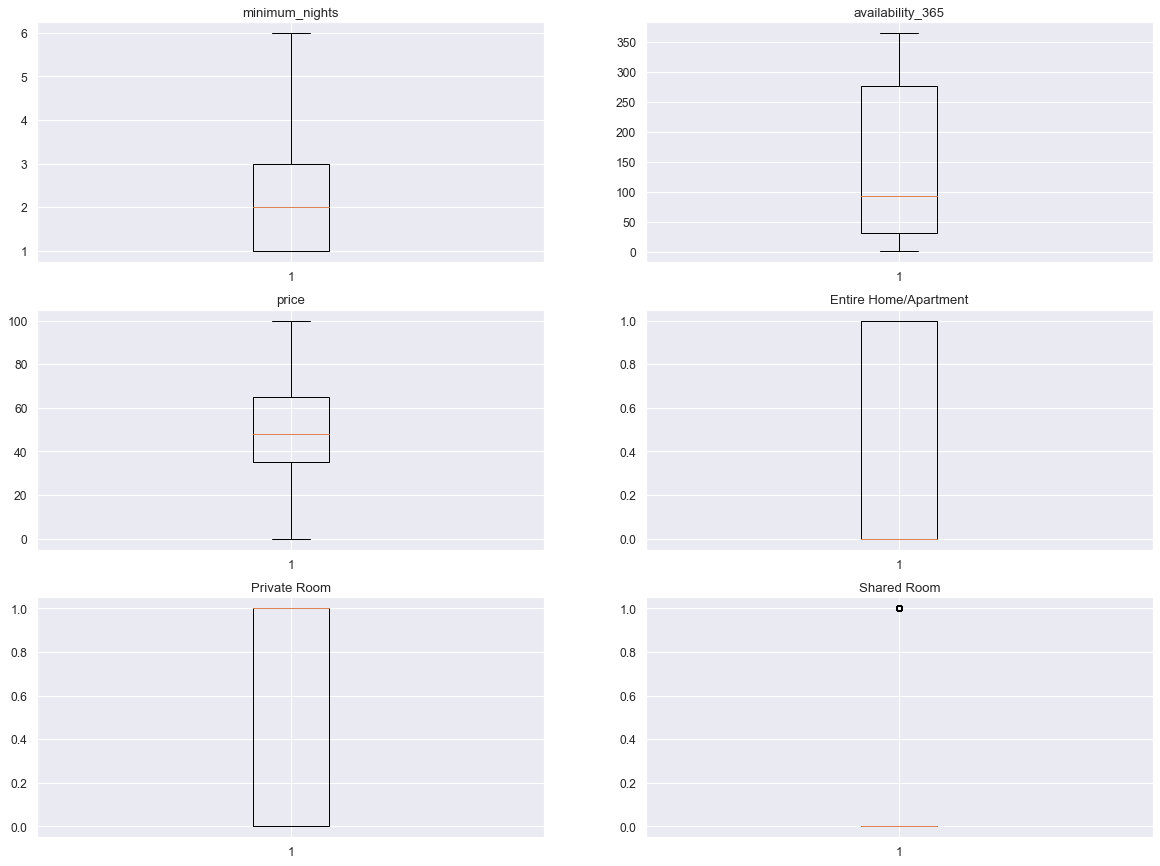

In [46]:
fig, axs = plt.subplots(3, 2, figsize = (20,15))


axs[0,0].boxplot(df['minimum_nights'])
axs[0,0].set_title('minimum_nights')
axs[0,1].boxplot(df['availability_365'])
axs[0,1].set_title('availability_365')

axs[1,0].boxplot(df['price'])
axs[1,0].set_title('price')
axs[1,1].boxplot(df['room_type_Entire home/apt'])
axs[1,1].set_title('Entire Home/Apartment')

axs[2,0].boxplot(df['room_type_Private room'])
axs[2,0].set_title('Private Room')
axs[2,1].boxplot(df['room_type_Shared room'])
axs[2,1].set_title('Shared Room')
plt.show()

# **Feature Engineering - Eksperimen 1**
## Pemilihan fitur yang akan digunakan sebelum data splitting classification
- Dari fitur room_type yang ada, hanya akan diambil room_type_Entire home/apt. Sisa fitur yang lain yang diambil adalah minimum_nights, availability_365, dan price
- room_type_Entire home/apt akan dijadikan label
- Pemberian nama baru untuk berbagai fitur dan label yang ada
- Masing - masing fitur & label dimasukkan kedalam inisiasi value data train & test, dimana label masuk ke y dan fitur lain masuk ke X

In [47]:
new_df = pd.DataFrame(df, columns=['minimum_nights','availability_365','price','room_type_Entire home/apt'])
new_df.columns = ['minimum','availability','price','type']

In [48]:
new_df.shape

(7644, 4)

In [79]:
feature_cols = ['minimum','availability','price']
X = new_df[feature_cols]
y = new_df.type

# **Data Splitting - Eksperimen 1**
- Data akan dibagi menjadi 2, yaitu data training dan data testing. Hal ini dilakukan untuk  lebih memahami performa model yang akan dibuat
- Importing train_test_split dari library sklearn.model_selection
- Test size nya 40% dan Training size ada 60%, sementara random state untuk penentuan randomness (berkaitan dengan entropy) berjumlah 1

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# **Evaluating - Eksperimen 1**
### Berikut merupakan evaluasi dari D.Tree Classification
- Evaluasi akurasi yang ada, akurasi dapat dipengaruhi oleh beberapa faktor salah satunya dan test_size dan random state yang digunakan pada Data splitting, max depth atau randomness dari data yang diambil (gini entropy)
- Eksperimen 1 mendapatkan akurasi 79% dengan menggunakan data train & test dari fitur yang ada
- Test size nya 40% dan Training size ada 60%, sementara random state untuk penentuan randomness (berkaitan dengan entropy) berjumlah 1

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Membuat classifier object untuk decision tree. Diberikan max_depth 3 agar terlimitasi sampai kedalaman 3 child saja
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#Entropy merupakan chance of randomness decision tree akan hasilkan, semakin kecil semakin sedikit randomnessnya

# Training classifier objectnya
classifier = classifier.fit(X_train,y_train)

#Prediksi hasil untuk test dataset
y_pred = classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7949640287769785


# **Classification Modelling - Eksperimen 1**
### Modelling untuk pemanggilan beberapa library untuk visualisasi data decision tree
- Decision tree yang dibuat memiliki kedalaman maksimum = 3
- Decision tree eksperimen 1 memberikan mayoritas price sebagai fitur untuk tiap decision node dan leaf node
- Entropy paling sedikit memberikan randomness data yang lebih sedikit, yang memiliki arti bahwa node tersebut lebih akurat dengan data nyatanya daripada entropy dengan entropy yang tinggi
- Apabila value pertama lebih tinggi daripada kedua, class masuk ke 0. Apabila sebaliknya, class masuk ke 1

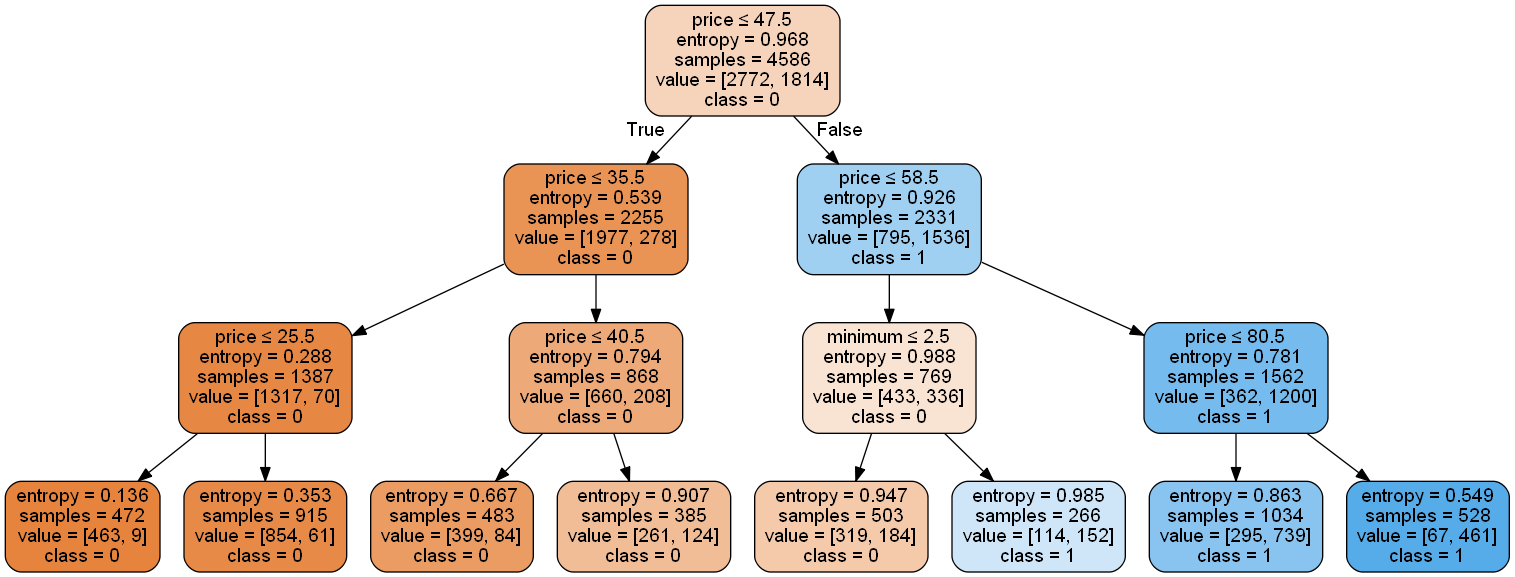

In [86]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
#import segala macam library yang mendukung translasi data agar dapat dilihat melalui gambar di Jupyter
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('airbnb_1.png')
Image(graph.create_png())

# **Feature Engineering - Eksperimen 2**
## Pemilihan fitur yang akan digunakan sebelum data splitting classification
- Dari fitur room_type yang ada, hanya akan diambil room_type_Entire home/apt. Sisa fitur yang lain yang diambil adalah minimum_nights dan availability_365. Berbeda dengan eksperimen 1, price di drop
- room_type_Entire home/apt akan dijadikan label
- Pemberian nama baru untuk berbagai fitur dan label yang ada
- Masing - masing fitur & label dimasukkan kedalam inisiasi value data train & test, dimana label masuk ke y dan fitur lain masuk ke X

In [87]:
feature_cols = ['minimum','availability']
X = new_df[feature_cols]
y = new_df.type

# **Data Splitting - Eksperimen 2**
- Data akan dibagi menjadi 2, yaitu data training dan data testing. Hal ini dilakukan untuk  lebih memahami performa model yang akan dibuat
- Importing train_test_split dari library sklearn.model_selection
- Test size 10%, train size 90%, random state 5

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

# **Evaluating - Eksperimen 2**
## Berikut merupakan evaluasi dari D.Tree Classification
- Evaluasi akurasi yang ada, akurasi dapat dipengaruhi oleh beberapa faktor salah satunya dan test_size dan random state yang digunakan pada Data splitting, max depth atau randomness dari data yang diambil (gini entropy)
- Eksperimen 2 mendapatkan akurasi 66% dengan menggunakan data train & test dari fitur yang ada. Lebih kecil dibanding eksperimen 1
- Test size 10%, train size 90%, random state 5

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Membuat classifier object untuk decision tree. Diberikan max_depth 3 agar terlimitasi sampai kedalaman 3 child saja
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#Entropy merupakan chance of randomness decision tree akan hasilkan, semakin kecil semakin sedikit randomnessnya

# Training classifier objectnya
classifier = classifier.fit(X_train,y_train)

#Prediksi hasil untuk test dataset
y_pred = classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.665359477124183


# **Classification Modelling - Eksperimen 2**
### Modelling untuk pemanggilan beberapa library untuk visualisasi data decision tree
- Decision tree yang dibuat memiliki kedalaman maksimum = 3
- Decision tree eksperimen 2 node yang diversitas/berbeda beda
- Entropy paling sedikit memberikan randomness data yang lebih sedikit, yang memiliki arti bahwa node tersebut lebih akurat dengan data nyatanya daripada entropy dengan entropy yang tinggi
- Apabila value pertama lebih tinggi daripada kedua, class masuk ke 0. Apabila sebaliknya, class masuk ke 1

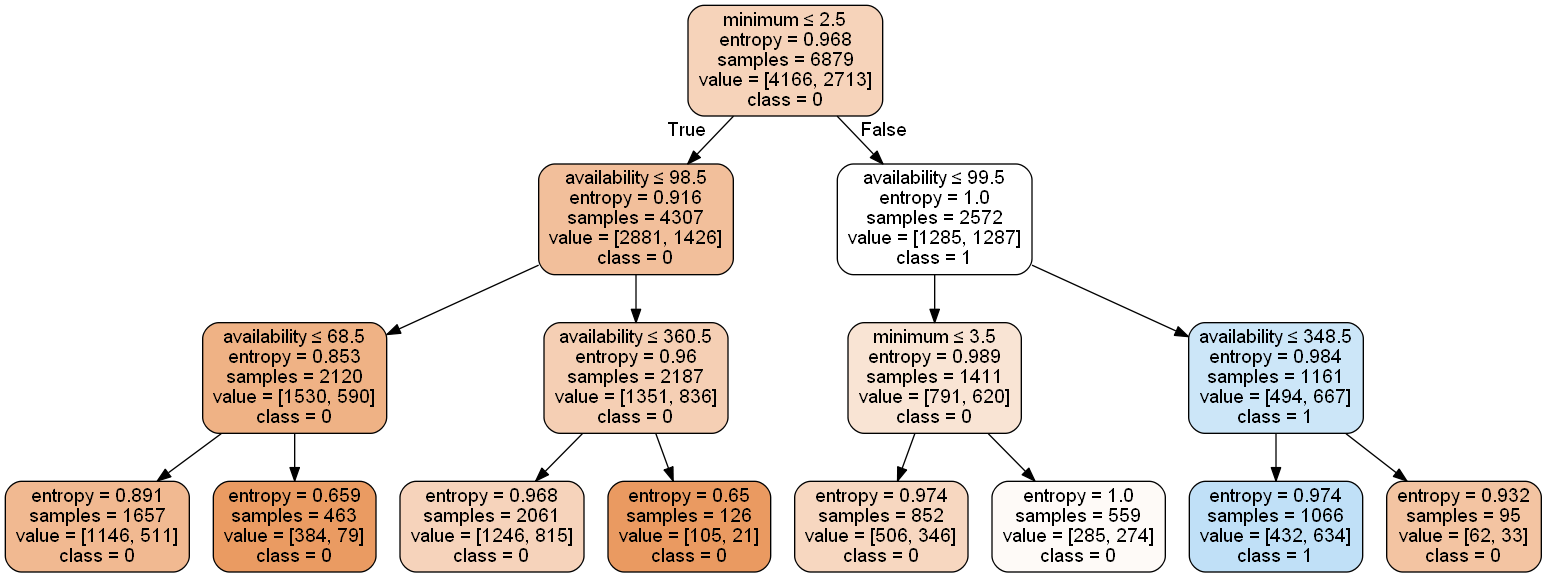

In [115]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
#import segala macam library yang mendukung translasi data agar dapat dilihat melalui gambar di Jupyter
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('airbnb_2.png')
Image(graph.create_png())

# **Kesimpulan - Decision Tree**
### Dari 2 buah eksperimen yang dilakukan sebelumnya dengan tahapan – tahapan yang telah dilalui, kita mendapati beberapa poin penting, yaitu:
-	Dalam proses klasifikasi dataset yang notabenenya unsupervised learning, proses pengklasifikasian harus melewati beberapa modifikasi pada dataframe yang sudah ada, termasuk dengan pemberian label target secara manual untuk menjadi target klasifikasi decision tree
-	Berbagai macam hasil dari klasifikasi decision tree ditentukan oleh data splitting, yang kemudian ditentukan lebih dalam oleh banyaknya dataset yang dijadikan data training maupun data testing. Kemudian banyaknya random state juga mempengaruhi kinerja proses klasifikasi.
-	Akurasi dari tiap evaluasi klasifikasi eksperimen berbeda – beda, eksperimen 1 memiliki eksperimen yang lebih tinggi daripada eksperimen 2 (79 > 66)
-	Berbagai macam setting klasifikasi seperti kriteria gini, entropy, max_depth dan lainnya mempengaruhi visualisasi yang jelas terhadap data yang diklasifikasikan.
-	Eksperimen 1 lebih baik daripada eksperimen 2, karena masih ada suatu hubungan korelasi antara 2 fitur (price dan room_type_Entire room/apt)
